In [211]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
athletes = pd.read_csv('athlete_events.csv')
athletes.shape

(271116, 15)

In [213]:
Population = pd.read_csv('WorldPopulation.csv')
Population.shape

(217, 62)

In [214]:
Population.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 61'], axis = 1, inplace=True)

In [215]:
Population.sample(3)

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
197,Tuvalu,TUV,6104.0,6246.0,6389.0,6538.0,6684.0,6815.0,6938.0,7040.0,...,10243.0,10340.0,10441.0,10531.0,10628.0,10725.0,10819.0,10908.0,11001.0,11097
182,Swaziland,SWZ,349174.0,357453.0,365636.0,373897.0,382469.0,391546.0,401183.0,411352.0,...,1138434.0,1158897.0,1180675.0,1202843.0,1225258.0,1248158.0,1271456.0,1295097.0,1319011.0,1343098
39,"Congo, Dem. Rep.",COD,15248251.0,15637733.0,16041263.0,16461930.0,16903923.0,17369883.0,17861881.0,18378214.0,...,58417562.0,60373608.0,62409435.0,64523263.0,66713597.0,68978682.0,71316033.0,73722860.0,76196619.0,78736153


In [216]:
athletes.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
84274,42805,Kent Douglas Greves,M,24.0,187.0,84.0,Canada,CAN,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,NaN
94921,48057,Moiss Daniel Hernndez Encarnacin,M,23.0,191.0,79.0,Dominican Republic,DOM,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Welterweight,NaN
176800,88898,Ole Olsen,M,38.0,NaN,NaN,Denmark,DEN,1908 Summer,1908,Summer,London,Shooting,"Shooting Men's Military Rifle, 200/500/600/800...",NaN


In [217]:
city = athletes['City'] == 'Beijing'
athletes[city].head(3)
athletes[city].shape

(13602, 15)

In [218]:
Population = pd.melt(Population, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population' )

In [219]:
Population['Year'] = pd.to_numeric(Population['Year'])

In [220]:
Population.head(3)

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0


In [221]:
#a = athletes.set_index('NOC').join(population_2008.set_index('Country Code'), how='inner')

In [222]:
Population = pd.merge(Population, athletes, left_on = ['Country Code', 'Year'], right_on = ['NOC', 'Year'])

In [223]:
Population.shape

(151931, 18)

In [224]:
Population.head(4)

,Country,Country Code,Year,Population,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,Afghanistan,AFG,1960,8996351.0,29626,Sultan Mohammad Dost,M,28.0,168.0,73.0,Afghanistan,AFG,1960 Summer,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Freestyle",NaN
1,Afghanistan,AFG,1960,8996351.0,39922,Abdul Ghafar Ghafoori,M,22.0,172.0,70.0,Afghanistan,AFG,1960 Summer,Summer,Roma,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
2,Afghanistan,AFG,1960,8996351.0,43901,Ghulam Mohiddin Gunga,M,26.0,168.0,81.0,Afghanistan,AFG,1960 Summer,Summer,Roma,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",NaN
3,Afghanistan,AFG,1960,8996351.0,58364,Mohammad Ibrahim Kederi,M,20.0,166.0,62.0,Afghanistan,AFG,1960 Summer,Summer,Roma,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN


In [225]:
Population.to_csv('athletePopulation.csv', sep=',')

In [226]:
Population = Population.drop( ['ID','NOC','Games'], axis=1)

In [227]:
print(Population.isnull().sum())

Country              0
Country Code         0
Year                 0
Population           0
Name                 0
Sex                  0
Age                545
Height            7426
Weight            8098
Team                 0
Season               0
City                 0
Sport                0
Event                0
Medal           132298
dtype: int64


In [228]:
Population = Population[Population['Age'].notna()]
Population = Population[Population['Weight'].notna()]
Population = Population[Population['Height'].notna()]
Population['Medal'].fillna('DNW', inplace = True)

In [229]:
print(Population.isnull().sum())

Country         0
Country Code    0
Year            0
Population      0
Name            0
Sex             0
Age             0
Height          0
Weight          0
Team            0
Season          0
City            0
Sport           0
Event           0
Medal           0
dtype: int64


In [230]:
Population.shape

(143142, 15)

In [231]:
#if athlete won medals then exceed 1, if not tehn exceeds 0
Population['Medal_Won'] = np.where(Population.loc[:,'Medal'] == 'DNW', 0, 1)

    

In [232]:
events = pd.pivot_table(Population,  index = ['Country', 'Year'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum',fill_value = 0).drop('DNW', axis = 1).reset_index()

#events = events.loc[events['Gold'] > 0, :]

Country = events['Country'].unique()

year = events['Year'].unique()




In [233]:
events.shape

(1604, 5)

In [234]:
events.head()

Medal,Country,Year,Bronze,Gold,Silver
0,Afghanistan,1960,0,0,0
1,Afghanistan,1964,0,0,0
2,Afghanistan,1968,0,0,0
3,Afghanistan,1972,0,0,0
4,Afghanistan,1980,0,0,0


In [235]:
medal_total = Population.groupby(['Year','Country'])['Medal_Won','Population'].agg('sum').reset_index()

In [236]:
medal_total.head()

,Year,Country,Medal_Won,Population
0,1960,Afghanistan,0,1.439416e+08
1,1960,Argentina,4,2.391813e+09
2,1960,Australia,42,2.846584e+09
3,1960,Austria,3,9.937030e+08
4,1960,Belgium,4,1.373023e+09


In [237]:
medal_total = medal_total.loc[medal_total['Medal_Won'] > 0, :]

In [238]:
medal_total.head()

,Year,Country,Medal_Won,Population
1,1960,Argentina,4,2.391813e+09
2,1960,Australia,42,2.846584e+09
3,1960,Austria,3,9.937030e+08
4,1960,Belgium,4,1.373023e+09
5,1960,Brazil,8,1.588566e+09


In [239]:
medal_total_pivot = pd.pivot_table(medal_total,
                     index = 'Country',
                     columns = 'Year',
                     values = 'Medal_Won',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

medal_total_pivot.loc[:,'All']

Country
USA          3623
Australia    1153
Russia       1132
China         985
Name: All, dtype: int64

In [240]:
USA_only = medal_total['Country']=='USA'
total_confirmed_by_day_USA_only = medal_total[USA_only]


In [241]:
total_confirmed_by_day_USA_only

,Year,Country,Medal_Won,Population
47,1960,USA,143,8.563805e+10
104,1964,USA,177,1.187793e+11
167,1968,USA,173,1.332688e+11
234,1972,USA,195,1.509152e+11
290,1976,USA,174,1.439031e+11
344,1980,USA,29,3.272040e+10
421,1984,USA,361,1.985646e+11
501,1988,USA,214,2.190711e+11
586,1992,USA,237,2.449709e+11
632,1994,USA,19,6.104523e+10


In [242]:
top_countries_won_Medal = ['USA', 'Australia', 'Russia', 'China']

country_medals = pd.pivot_table(medal_total, index = 'Year',columns = 'Country',values = 'Medal_Won',aggfunc = 'sum')[top_countries_won_Medal]

In [243]:
country_medals

Country,USA,Australia,Russia,China
Year,,,,
1960,143.0,42.0,NaN,NaN
1964,177.0,37.0,NaN,NaN
1968,173.0,51.0,NaN,NaN
1972,195.0,20.0,NaN,NaN
1976,174.0,22.0,NaN,NaN
1980,29.0,13.0,NaN,NaN
1984,361.0,52.0,NaN,74.0
1988,214.0,35.0,NaN,52.0
1992,237.0,52.0,NaN,81.0


In [244]:
country_medals = pd.merge(total_confirmed_by_day_USA_only, country_medals, left_on = ['Year','Medal_Won'], right_on = ['Year','USA'])


In [245]:
country_medals.drop( ['Country','Medal_Won'], axis=1)

,Year,Population,USA,Australia,Russia,China
0,1960,8.563805e+10,143.0,42.0,NaN,NaN
1,1964,1.187793e+11,177.0,37.0,NaN,NaN
2,1968,1.332688e+11,173.0,51.0,NaN,NaN
3,1972,1.509152e+11,195.0,20.0,NaN,NaN
4,1976,1.439031e+11,174.0,22.0,NaN,NaN
5,1980,3.272040e+10,29.0,13.0,NaN,NaN
6,1984,1.985646e+11,361.0,52.0,NaN,74.0
7,1988,2.190711e+11,214.0,35.0,NaN,52.0
8,1992,2.449709e+11,237.0,52.0,NaN,81.0
9,1994,6.104523e+10,19.0,3.0,33.0,3.0


In [246]:
country_medals = country_medals.rename({'Population': 'Population_USA'}, axis=1)

Text(0, 0.5, 'Population in USA')

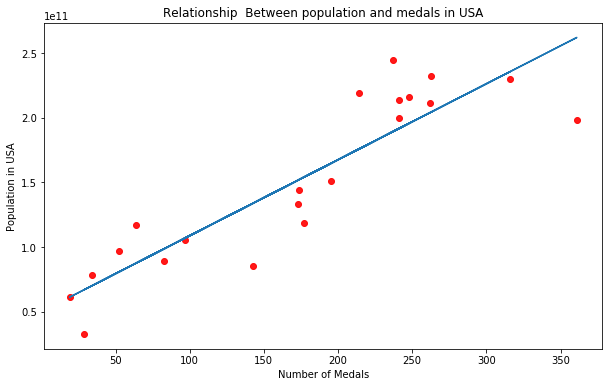

In [247]:
slope, intercept, r, p, std_err = stats.linregress(country_medals['USA'], country_medals['Population_USA'])

def myfunc(x):
    return slope * x + intercept
mymodel = list(map(myfunc, country_medals['USA']))

fig, ax = plt.subplots(figsize=(10, 6))

# scatter the sepal_length against the sepal_width
ax.scatter(country_medals['USA'], country_medals['Population_USA'],alpha = 0.9,color ='red')
ax.plot(country_medals['USA'], mymodel)
# set a title and labels
ax.set_title('Relationship  Between population and medals in USA')
ax.set_xlabel('Number of Medals')
ax.set_ylabel('Population in USA')
